In [62]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrcra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
def read_text(file_dir):
    with open(file_dir) as f:
        lines = f.readlines()
        lines = ''.join(lines)
        lines = lines.replace('\n', ' ')
    return lines

In [64]:
def preprocessing(text):
    cleaned_text = re.sub("(\.)|(\d+:\d+:\d+,\d+ --> \d+:\d+:\d+,\d+)|(\d+)", " ", text)
    cleaned_text = re.sub("\d", " ", cleaned_text)
    cleaned_text = re.sub("[\"\,\\!\-\?]", " ", cleaned_text[4:-1])
    cleaned_text = re.sub(" +", " ", cleaned_text)
    cleaned_text = cleaned_text.strip()
    cleaned_text = cleaned_text.lower()
    print(cleaned_text)
    return cleaned_text

In [65]:
batman_text = read_text('subtitle/batman_text.txt')
batman_cleaned_text = preprocessing(batman_text)

three of a kind let's do this that's it three guys two guys on the roof every guy gets a share five shares is plenty six shares don't forget the guy who planned the job he thinks he can sit it out and still take a slice i know why they call him the joker why do they call him the joker i heard he wears makeup makeup yeah to scare people you know war paint all right everybody hands up heads down i said hands up heads down let's go pal i'm making a withdrawal here i said hands up no here comes the silent alarm and there it goes heads down all right tootsie you're taking a dive with me down i said stay down there don't hurt me funny it didn't dial it was trying to reach a private number is it a problem no i'm done here sit down down down i said stay down there obviously we don't want you doing anything with your hands other than holding on for dear life on the ground stay on the ground nobody make a move nobody stay down yeah you have any idea who you're stealing from you and your friends 

In [66]:
dunkirk_text = read_text('subtitle/dunkirk_text.txt')
dunkirk_cleaned_text = preprocessing(dunkirk_text)

english i'm english it's grenadiers mate make way out of the way go go go along the mole all the way the ship's about to leave along the mole all the way the ship's about to leave where's the bloody air force the navy's requisitioned her they'll be back in an hour my dad wants to be ready before then they've told us to strip her and load those life jackets some men across the channel at dunkirk need taking off some men check fuel fortis and gallons gallons fortis leader stay down at feet to leave fuel for minute fighting time over dunkirk understood vector angels point five and keep an eye on that gauge even when it gets lively save enough to get back no french soldiers no french soldiers no no no french english only english only past this point no it's a british ship no you have your own ships get back get back no you've got your own ships this is a british ship no get back look get the stretchers through there are stretchers coming get out of the way out of the way go go go along the

In [67]:
interstellar_text = read_text('subtitle/interstellar_text.txt')
interstellar_cleaned_text = preprocessing(interstellar_text)

well my dad was a farmer like everybody else back then of course he didn't start that way computer says you're too tight nah i got this crossing the straights shutting it down cooper no shutting it all down no i need power up dad sorry murph go back to bed i thought you were the ghost no there are no such things as ghosts babe grandpa says you can get ghosts maybe that's because grandpa's close to being one himself back to bed were you dreaming about the crash get your butt back in bed murph the wheat had died the blight came and we had to burn it and we still had corn we had acres of corn but mostly we had dust i guess i can't describe it it was just constant just that steady blow of dirt we wore little strips of sheet sometimes over our nose and mouth so that we wouldn't breathe so much of it when we set the table we always set the plate upside down glasses or cups whatever it was upside down shake a leg murph get a move on tom : today you and me in the barn herbicide resistance chec

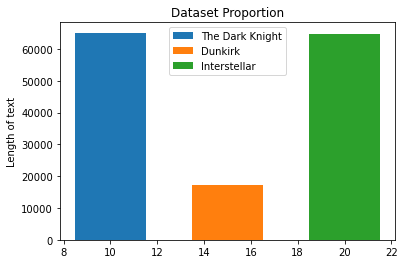

In [68]:
plt.bar(10,len(batman_cleaned_text),3, label="The Dark Knight")
plt.bar(15,len(dunkirk_cleaned_text),3, label="Dunkirk")
plt.bar(20,len(interstellar_cleaned_text),3, label="Interstellar")
plt.legend()
plt.ylabel('Length of text')
plt.title('Dataset Proportion')
plt.show()

In [69]:
len(batman_cleaned_text) + len(dunkirk_cleaned_text) + len(interstellar_cleaned_text)

146851

In [70]:
corpus_list = {"id": ["The Dark Knight", "Dunkirk", "Interstellar"], "text":[batman_cleaned_text,dunkirk_cleaned_text, interstellar_cleaned_text]}

In [71]:
corpus_df = pd.DataFrame.from_dict(corpus_list)

In [72]:
corpus_df

,id,text
0,The Dark Knight,three of a kind let's do this that's it three ...
1,Dunkirk,english i'm english it's grenadiers mate make ...
2,Interstellar,well my dad was a farmer like everybody else b...


# Top words before stop word removal
Collect vocabulary count

In [73]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
X = count_vectorizer.fit_transform(corpus_df['text'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [74]:
keys = count_vectorizer.get_feature_names_out()

In [75]:
vocab_arr = X.toarray()
vocab_arr

array([[0, 0, 1, ..., 1, 0, 1],
       [5, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int64)

Store the vocab and counts in a pandas dataframe

In [76]:
# list to store the vocab and counts
vocab = []
count = []

for word in range(len(keys)):
    counter = 0
    for document in range(len(vocab_arr)):
        counter += vocab_arr[document][word]
    vocab.append(keys[word])
    count.append(counter)
    print(keys[word], counter)

abandon 5
abandoned 1
abducted 1
able 6
aboard 1
about 104
above 4
absolute 1
absolutely 2
abundantly 1
accent 1
accept 2
access 3
accessed 1
accident 2
accidentally 2
accomplice 2
according 1
accountant 1
accused 1
ace 1
achieved 1
acquire 1
acres 1
across 7
act 2
activated 1
active 1
actually 6
adapt 2
additional 1
addresses 1
administration 1
admiral 1
admissions 1
admitted 1
admitting 1
adrift 1
advanced 1
advised 1
aerodynamics 1
affairs 2
affirmative 1
afford 3
afield 1
afraid 10
after 32
afternoon 2
afterwards 1
again 21
against 11
age 7
agencies 1
agent 2
aggravated 1
aggressive 1
agile 1
ago 12
agonizing 1
agree 1
agreed 2
agriculture 1
aground 1
ah 5
ahead 5
ahem 1
aim 3
aimed 1
ain 4
air 13
airlock 3
airplane 1
alarm 2
alfred 10
alias 1
alibi 1
alive 9
alkali 1
all 153
allow 4
allowed 1
allows 1
almost 9
alone 9
along 10
alpha 1
already 8
also 1
although 1
altitude 2
aluminum 1
always 13
am 18
amazing 1
ambush 1
amelia 6
amen 1
american 1
ammonia 4
ammonium 1
amount 2
an 52


In [77]:
# store the count in pandas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [78]:
vocab_bef_stem

you        1129
the        1062
to          741
it          563
we          464
           ... 
loyalty       1
loyal         1
low           1
loud          1
zeroing       1
Length: 3417, dtype: int64

<AxesSubplot:>

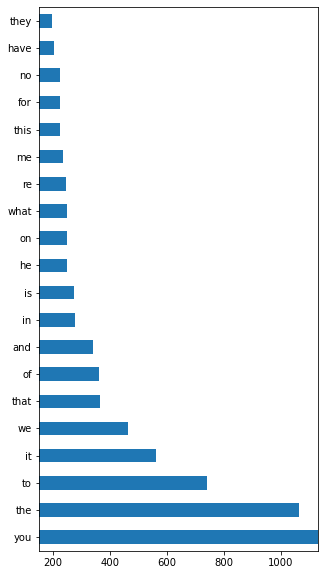

In [79]:
# Bar plot of top words before stop word removal
top_vocab = vocab_bef_stem.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,10), xlim= (150, 1129))

# Top words after stop word removal


In [80]:
# function for stop word removal
def remove_stopwords(text):
    # '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    # for word in text.split():
    #     if word.lower() not in stopwords.
    text = [word.lower() for word in text.split() if word.lower() not in stopwords.words('english')]
    # joining the list of words with space separator
    return " ".join(text)

In [81]:
corpus_df['text'] = corpus_df['text'].apply(remove_stopwords)
corpus_df

,id,text
0,The Dark Knight,three kind let's that's three guys two guys ro...
1,Dunkirk,english i'm english grenadiers mate make way w...
2,Interstellar,well dad farmer like everybody else back cours...


In [82]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
X = count_vectorizer.fit_transform(corpus_df['text'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [83]:
keys = count_vectorizer.get_feature_names_out()

In [84]:
vocab_arr = X.toarray()
vocab_arr

array([[0, 0, 1, ..., 1, 0, 1],
       [5, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int64)

In [85]:
# list to store the vocab and counts
vocab = []
count = []

for word in range(len(keys)):
    counter = 0
    for document in range(len(vocab_arr)):
        counter += vocab_arr[document][word]
    vocab.append(keys[word])
    count.append(counter)
    print(keys[word], counter)

abandon 5
abandoned 1
abducted 1
able 6
aboard 1
absolute 1
absolutely 2
abundantly 1
accent 1
accept 2
access 3
accessed 1
accident 2
accidentally 2
accomplice 2
according 1
accountant 1
accused 1
ace 1
achieved 1
acquire 1
acres 1
across 7
act 2
activated 1
active 1
actually 6
adapt 2
additional 1
addresses 1
administration 1
admiral 1
admissions 1
admitted 1
admitting 1
adrift 1
advanced 1
advised 1
aerodynamics 1
affairs 2
affirmative 1
afford 3
afield 1
afraid 10
afternoon 2
afterwards 1
age 7
agencies 1
agent 2
aggravated 1
aggressive 1
agile 1
ago 12
agonizing 1
agree 1
agreed 2
agriculture 1
aground 1
ah 5
ahead 5
ahem 1
aim 3
aimed 1
ain 4
air 13
airlock 3
airplane 1
alarm 2
alfred 10
alias 1
alibi 1
alive 9
alkali 1
allow 4
allowed 1
allows 1
almost 9
alone 9
along 10
alpha 1
already 8
also 1
although 1
altitude 2
aluminum 1
always 13
am 1
amazing 1
ambush 1
amelia 6
amen 1
american 1
ammonia 4
ammonium 1
amount 2
analysis 1
analyze 3
anarchy 1
angels 3
angry 1
anna 1
annual 

In [86]:
# store the count in pandas dataframe with vocab as index
vocab_aft_stop_words = pd.Series(count, index=vocab)
# sort the dataframe
vocab_aft_stop_words = vocab_aft_stop_words.sort_values(ascending=False)
vocab_aft_stop_words

know          160
get           157
go            152
one           135
we            128
             ... 
horrifying      1
hopefully       1
hoped           1
hoop            1
zeroing         1
Length: 3301, dtype: int64

<AxesSubplot:>

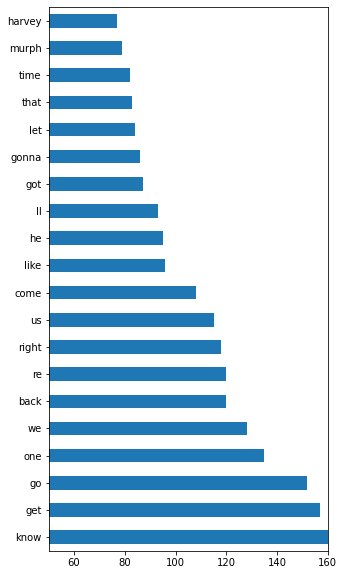

In [88]:
# Bar plot of top words before stop word removal
top_vocab = vocab_aft_stop_words.head(20)
top_vocab.plot(kind='barh', figsize=(5, 10), xlim=(50, 160))